# Titanic: Machine Learning from Disaster

Homepage: https://github.com/tien-le/kaggle-titanic

**unbelivable ... to achieve 1.000. How did they do this?**

**Just curious, how did they cheat the score?** ANS: maybe, we have the information existing in https://www.encyclopedia-titanica.org/titanic-victims/

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Practice Skills
* Binary classification
* Python and R basics

## References
https://www.kaggle.com/c/titanic

https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

https://triangleinequality.wordpress.com/2013/05/19/machine-learning-with-python-first-steps-munging/

https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic


## Data overview
The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

| **Variable**  | **Definition**  |**Key**  |
|----|----|----|
| eq | qe | qe | 
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
| sex | Sex |  | 	
| Age | Age in years |  |	
| sibsp | # of siblings / spouses aboard the Titanic |  | 	
| parch | # of parents / children aboard the Titanic |  |	
| ticket | Ticket number |  | 	
| fare | Passenger fare |  | 	
| cabin | Cabin number |  | 	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |
| Variable | Notes |  |

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Data Exploration

**Five Steps: Variable Identification, Uni-variate Analysis, Bi-variate Analysis, Missing Values Imputation, Outlier Treament**

### Step 1. Variable Identification
* Identify Preditor (input) variables + Target (output) variables
* Identify the data type and category of variables


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import random

In [2]:
trn_corpus = pd.read_csv("data/train.csv")

#889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,,1,2,W./C. 6607,23.45,,S --> containing NaN
trn_corpus.set_index("PassengerId", inplace=True)
trn_corpus.info()
trn_corpus.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
trn_corpus.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tst_corpus = pd.read_csv("data/test.csv")

tst_corpus.set_index("PassengerId", inplace=True)
tst_corpus.info()
tst_corpus.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
tst_corpus.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Adding Column "Survived" from file "gender_submission.csv"

In [6]:
expected_labels = pd.read_csv("data/gender_submission.csv")

expected_labels.set_index("PassengerId", inplace=True)
expected_labels.info()
expected_labels.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB


,Survived
count,418.000000
mean,0.363636
std,0.481622
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
expected_labels.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [8]:
trn_corpus.index.names

FrozenList(['PassengerId'])

In [9]:
expected_labels.index.names

FrozenList(['PassengerId'])

In [10]:
#pd.merge(tst_corpus, expected_labels, how="inner", on="PassengerId")

tst_corpus_having_expected_label = pd.concat([tst_corpus, expected_labels], axis=1, join='inner')
tst_corpus_having_expected_label.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [11]:
print("Columns name: ", trn_corpus.columns)
print("Num of columns: ", len(trn_corpus.columns))
print("Num of rows: ", len(trn_corpus.index)) #trn_corpus.shape[0]

trn_corpus_size = len(trn_corpus.index)

Columns name:  Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Num of columns:  11
Num of rows:  891


In [12]:
print("Columns name: ", tst_corpus.columns)
print("Num of columns: ", len(tst_corpus.columns))
print("Num of rows: ", len(tst_corpus.index)) #tst_corpus.shape[0]

tst_corpus_size = len(tst_corpus.index)

Columns name:  Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')
Num of columns:  10
Num of rows:  418


#### Overview of Data using visualization

In [13]:
#sns.pairplot(trn_corpus.dropna())

In [14]:
#sns.pairplot(tst_corpus.dropna())

#### Concatenating trn_corpus and tst_corpus_having_expected_label using append

In [15]:
df = trn_corpus.append(tst_corpus_having_expected_label)

print("Columns name: ", df.columns)
print("Num of columns: ", len(df.columns))
print("Num of rows: ", len(df.index)) #trn_corpus.shape[0]

print("Sum of trn_corpus_size and tst_corpus_size: ", trn_corpus_size + tst_corpus_size)

Columns name:  Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')
Num of columns:  11
Num of rows:  1309
Sum of trn_corpus_size and tst_corpus_size:  1309


In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.377387
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.484918
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


### Answer for Step 1:

**1. Preditor (input) Variables and Data type**
* PassengerId    891 non-null int64
* Pclass         891 non-null int64
* Name           891 non-null object
* Sex            891 non-null object
* Age            **714** non-null float64
* SibSp          891 non-null int64
* Parch          891 non-null int64
* Ticket         891 non-null object
* Fare           891 non-null float64
* Cabin          **204** non-null object
* Embarked       **889** non-null object

**2. Target (output) Variables and Data Type**
* Survived       891 non-null int64

**3. Category of Variables**
* Continuous variables
    * PassengerId    891 non-null int64 #primary key
    * Age            **714** non-null float64
    * Fare           891 non-null float64
* Categorial variables
    * Name           891 non-null object
    * Sex            891 non-null object
    * Ticket         891 non-null object
    * Cabin          **204** non-null object
    * Embarked       **889** non-null object # embarked -- Port of Embarkation -- C = Cherbourg, Q = Queenstown, S = Southampton
    
    * SibSp          891 non-null int64 # # of siblings / spouses aboard the Titanic -- [1 0 3 4 2 5 8] ; 7 items
    * Parch          891 non-null int64 # # of parents / children aboard the Titanic -- [0 1 2 5 3 4 6] ; 7 items
    * Survived       891 non-null int64 #survival -- Survival -- 0 = No, 1 = Yes
    * Pclass         891 non-null int64 #pclass -- Ticket class -- 1 = 1st, 2 = 2nd, 3 = 3rd

**Verify the unique data in each variables**

In [17]:
#df.head()

In [18]:
#print("PassengerId:", df["PassengerId"].unique(), ";", df["PassengerId"].nunique(), "items")
print("Survived:", df["Survived"].unique(), ";", df["Survived"].nunique(), "items")
print("Pclass:", df["Pclass"].unique(), ";", df["Pclass"].nunique(), "Pclass")
#print("Name:", df["Name"].unique(), ";", df["Name"].nunique(), "items")
print("Sex:", df["Sex"].unique(), ";", df["Sex"].nunique(), "items")
#print("Age:", df["Age"].unique(), ";", df["Age"].nunique(), "items")
print("SibSp:", df["SibSp"].unique(), ";", df["SibSp"].nunique(), "items")
print("Parch:", df["Parch"].unique(), ";", df["Parch"].nunique(), "items")
#print("Ticket:", df["Ticket"].unique(), ";", df["Ticket"].nunique(), "items") # 681 items
#print("Fare:", df["Fare"].unique(), ";", df["Fare"].nunique(), "items") # 248 items
#print("Cabin:", df["Cabin"].unique(), ";", df["Cabin"].nunique(), "items") # 147 items
print("Embarked:", df["Embarked"].unique(), ";", df["Embarked"].nunique(), "items")

Survived: [0 1] ; 2 items
Pclass: [3 1 2] ; 3 Pclass
Sex: ['male' 'female'] ; 2 items
SibSp: [1 0 3 4 2 5 8] ; 7 items
Parch: [0 1 2 5 3 4 6 9] ; 8 items
Embarked: ['S' 'C' 'Q' nan] ; 3 items


### Bonus - Step 1:
Ref: https://triangleinequality.wordpress.com/2013/05/19/machine-learning-with-python-first-steps-munging/

In [19]:
trn_corpus.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


So we use read_csv since that is the form (comma separated values), the data is in. Pandas automatically gave the columns names from the header and inferred the data types. For large data sets it is recommended that you specify the data types manually.

Notice that the age, cabin and embarked columns have null values. Also we apparently have some free-loaders because the minimum fare is 0. We might think that these are babies, so let’s check that:

In [20]:
trn_corpus[['Age','Fare']][trn_corpus.Fare < 5]

,Age,Fare
PassengerId,,
180,36.0,0.0000
264,40.0,0.0000
272,25.0,0.0000
278,NaN,0.0000
303,19.0,0.0000
379,20.0,4.0125
414,NaN,0.0000
467,NaN,0.0000
482,NaN,0.0000


These guys are surely old enough to know better! But notice that there is a jump from a fare of 0 to 4, so there is something going on here, most likely these are errors, so let’s replace them by the mean fare for their class, and do the same for null values.

In [21]:
df.nunique()

Age           98
Cabin        186
Embarked       3
Fare         281
Name        1307
Parch          8
Pclass         3
Sex            2
SibSp          7
Survived       2
Ticket       929
dtype: int64

In [22]:
#first we set those fares of 0 to nan
#trn_corpus.Fare = trn_corpus.Fare.map(lambda x: np.nan if x==0 else x)
df.Fare = df.Fare.map(lambda x: np.nan if x==0 else x)

#not that lambda just means a function we make on the fly
#calculate the mean fare for each class
classmeans_trn_corpus = trn_corpus.pivot_table('Fare', index = 'Pclass', aggfunc = "mean") #np.mean
classmeans_trn_corpus

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [23]:
df.nunique()

Age           98
Cabin        186
Embarked       3
Fare         280
Name        1307
Parch          8
Pclass         3
Sex            2
SibSp          7
Survived       2
Ticket       929
dtype: int64

In [24]:
trn_corpus.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [25]:
#df.head()

In [26]:
#trn_corpus.head()

In [27]:
classmeans_trn_corpus.query('Pclass == 3')

,Fare
Pclass,
3,13.67555


In [28]:
classmeans_trn_corpus.xs(3)["Fare"]

13.675550101832997

In [29]:
classmeans_trn_corpus.query('Pclass == 3')

,Fare
Pclass,
3,13.67555


### Step 2. Uni-variate Analysis

In this step, we explore the variables one by one. It depends on the variable type: Continuous or Categorial.

**Continuous Variables**

--> Understanding the central tendency and spread of the variables.

+ Central Tendency: mean, mode, median, min, max
+ Measure of Dispersion: range, Quartile, IQR (Interquartile Range), Variance, Standard Deviation, Skewness, Kurtosis
+ Visualization Methods: Histogram, Box Plot

* Continuous variables
    * Age            **714** non-null float64
    * Fare           891 non-null float64


* Central Tendency: mean, mode, median, min, max

In [30]:
print("Central Tendency - for Age")
trn_corpus["Age"].describe()

Central Tendency - for Age


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
trn_corpus_Age_dropna = trn_corpus["Age"].dropna()

In [32]:
#Ref: https://docs.python.org/3/library/statistics.html
import statistics

corpus_stat = trn_corpus_Age_dropna.copy()
    
print("=" * 36)
print("=" * 36)
print("Averages and measures of central location - Age")
print("These functions calculate an average or typical value from a population or sample.")
print("-" * 36)

print("Mode (most common value) of discrete data = ", statistics.mode(trn_corpus["Age"]))

print("Arithmetic mean (“average”) of data = ", statistics.mean(corpus_stat))
#print("Harmonic mean of data = ", statistics.harmonic_mean(trn_corpus_Age_dropna))
#StatisticsError is raised if data is empty, or any element is less than zero. New in version 3.6.

print("Median (middle value) of data = ", statistics.median(corpus_stat))
print("Median, or 50th percentile, of grouped data = ", statistics.median_grouped(corpus_stat)) 
print("Low median of data = ", statistics.median_low(corpus_stat))
print("High median of data = ", statistics.median_high(corpus_stat))

print("-" * 36)
#Method 2 - Using DataFrame
print("Arithmetic mean (“average”) of data = ", trn_corpus["Age"].mean())
print("Max = ", trn_corpus["Age"].max())
print("Min = ", trn_corpus["Age"].min())
print("Count = ", trn_corpus["Age"].count())

Averages and measures of central location - Age
These functions calculate an average or typical value from a population or sample.
------------------------------------
Mode (most common value) of discrete data =  24.0
Arithmetic mean (“average”) of data =  29.6991176471
Median (middle value) of data =  28.0
Median, or 50th percentile, of grouped data =  28.3
Low median of data =  28.0
High median of data =  28.0
------------------------------------
Arithmetic mean (“average”) of data =  29.6991176471
Max =  80.0
Min =  0.42
Count =  714


In [33]:
print("Central Tendency - for Fare")
trn_corpus["Fare"].describe()

Central Tendency - for Fare


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [34]:
trn_corpus_Fare_dropna = trn_corpus["Fare"].dropna()

In [35]:
#Ref: https://docs.python.org/3/library/statistics.html
import statistics

corpus_stat = trn_corpus_Fare_dropna.copy()
    
print("=" * 36)
print("=" * 36)
print("Averages and measures of central location - Age")
print("These functions calculate an average or typical value from a population or sample.")
print("-" * 36)

print("Mode (most common value) of discrete data = ", statistics.mode(trn_corpus["Fare"]))

print("Arithmetic mean (“average”) of data = ", statistics.mean(corpus_stat))
#print("Harmonic mean of data = ", statistics.harmonic_mean(trn_corpus_Age_dropna))
#StatisticsError is raised if data is empty, or any element is less than zero. New in version 3.6.

print("Median (middle value) of data = ", statistics.median(corpus_stat))
print("Median, or 50th percentile, of grouped data = ", statistics.median_grouped(corpus_stat)) 
print("Low median of data = ", statistics.median_low(corpus_stat))
print("High median of data = ", statistics.median_high(corpus_stat))

print("-" * 36)
#Method 2 - Using DataFrame
print("Arithmetic mean (“average”) of data = ", trn_corpus["Fare"].mean())
print("Max = ", trn_corpus["Fare"].max())
print("Min = ", trn_corpus["Fare"].min())
print("Count = ", trn_corpus["Fare"].count())

Averages and measures of central location - Age
These functions calculate an average or typical value from a population or sample.
------------------------------------
Mode (most common value) of discrete data =  8.05
Arithmetic mean (“average”) of data =  32.2042079686
Median (middle value) of data =  14.4542
Median, or 50th percentile, of grouped data =  14.7399142857
Low median of data =  14.4542
High median of data =  14.4542
------------------------------------
Arithmetic mean (“average”) of data =  32.2042079686
Max =  512.3292
Min =  0.0
Count =  891


* Measure of Dispersion: range, Quartile, IQR (Interquartile Range), Variance, Standard Deviation, Skewness, Kurtosis

Ref: https://github.com/pandas-dev/pandas/blob/v0.20.3/pandas/core/generic.py#L5665-L5968
        
        For numeric data, the result's index will include ``count``,
        ``mean``, ``std``, ``min``, ``max`` as well as lower, ``50`` and
        upper percentiles. By default the lower percentile is ``25`` and the
        upper percentile is ``75``. The ``50`` percentile is the
        same as the median.


In [36]:
print("=" * 36)
print("=" * 36)

corpus_stat = trn_corpus_Age_dropna.copy()

print("Measures of spread - Age")
print("""These functions calculate a measure of how much the population or sample tends to deviate 
      from the typical or average values.""")

print("-" * 36)
print("Population standard deviation of data = ", statistics.pstdev(corpus_stat))
print("Population variance of data = ", statistics.pvariance(corpus_stat))
print("Sample standard deviation of data = ", statistics.stdev(corpus_stat))
print("Sample variance of data = ", statistics.variance(corpus_stat))

print("-" * 36)
corpus_stat = trn_corpus["Age"].copy()

print("Range = max - min = ", corpus_stat.max() - corpus_stat.min())
print("Quartile 25%, 50%, 75% = ", corpus_stat.describe()[['25%','50%','75%']][0], 
      corpus_stat.describe()[['25%','50%','75%']][1], 
      corpus_stat.describe()[['25%','50%','75%']][2])
print(corpus_stat.describe()[['25%','50%','75%']])
print("IQR (Interquartile Range) = Q3-Q1 = ", 
      corpus_stat.describe()[['25%','50%','75%']][2] - corpus_stat.describe()[['25%','50%','75%']][0])
print("Variance = ", corpus_stat.var())
print("Standard Deviation = ", corpus_stat.std())

print("Skewness = ", corpus_stat.skew()) 
print("Kurtosis = ", corpus_stat.kurtosis())


Measures of spread - Age
These functions calculate a measure of how much the population or sample tends to deviate 
      from the typical or average values.
------------------------------------
Population standard deviation of data =  14.516321150817316
Population variance of data =  210.723579754
Sample standard deviation of data =  14.526497332334042
Sample variance of data =  211.019124746
------------------------------------
Range = max - min =  79.58
Quartile 25%, 50%, 75% =  20.125 28.0 38.0
25%    20.125
50%    28.000
75%    38.000
Name: Age, dtype: float64
IQR (Interquartile Range) = Q3-Q1 =  17.875
Variance =  211.019124746
Standard Deviation =  14.5264973323
Skewness =  0.389107782301
Kurtosis =  0.178274153642


**Comments:**
* Skewness > 0 ==> Positively skewed or Skewed to the right
* Kurtosis > 0 ==> Fatter tail (Leptokurtic). Ref: http://www.investopedia.com/terms/l/leptokurtic.asp

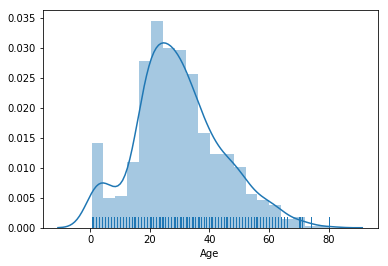

In [37]:
sns.distplot(trn_corpus_Age_dropna, rug=True, hist=True)

In [38]:
trn_corpus["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
print("=" * 36)
print("=" * 36)

corpus_stat = trn_corpus_Fare_dropna.copy()

print("Measures of spread - Fare")
print("""These functions calculate a measure of how much the population or sample tends to deviate 
      from the typical or average values.""")

print("-" * 36)
print("Population standard deviation of data = ", statistics.pstdev(corpus_stat))
print("Population variance of data = ", statistics.pvariance(corpus_stat))
print("Sample standard deviation of data = ", statistics.stdev(corpus_stat))
print("Sample variance of data = ", statistics.variance(corpus_stat))

print("-" * 36)
corpus_stat = trn_corpus["Fare"].copy()

print("Range = max - min = ", corpus_stat.max() - corpus_stat.min())
print("Quartile 25%, 50%, 75% = ", corpus_stat.describe()[['25%','50%','75%']][0], 
      corpus_stat.describe()[['25%','50%','75%']][1], 
      corpus_stat.describe()[['25%','50%','75%']][2])
print(corpus_stat.describe()[['25%','50%','75%']])
print("IQR (Interquartile Range) = Q3-Q1 = ", 
      corpus_stat.describe()[['25%','50%','75%']][2] - corpus_stat.describe()[['25%','50%','75%']][0])
print("Variance = ", corpus_stat.var())
print("Standard Deviation = ", corpus_stat.std())

print("Skewness = ", corpus_stat.skew()) 
print("Kurtosis = ", corpus_stat.kurtosis())


Measures of spread - Fare
These functions calculate a measure of how much the population or sample tends to deviate 
      from the typical or average values.
------------------------------------
Population standard deviation of data =  49.66553444477411
Population variance of data =  2466.66531169
Sample standard deviation of data =  49.6934285971809
Sample variance of data =  2469.43684574
------------------------------------
Range = max - min =  512.3292
Quartile 25%, 50%, 75% =  7.9104 14.4542 31.0
25%     7.9104
50%    14.4542
75%    31.0000
Name: Fare, dtype: float64
IQR (Interquartile Range) = Q3-Q1 =  23.0896
Variance =  2469.43684574
Standard Deviation =  49.6934285972
Skewness =  4.78731651967
Kurtosis =  33.3981408809


**Comments:**
* Skewness > 0 ==> Positively skewed or Skewed to the right
* Kurtosis > 0 ==> Fatter tail (Leptokurtic). Ref: http://www.investopedia.com/terms/l/leptokurtic.asp

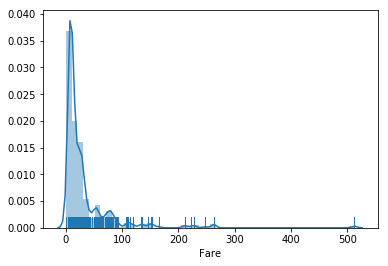

In [40]:
sns.distplot(trn_corpus_Fare_dropna, rug=True, hist=True)

In [41]:
trn_corpus["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

* Visualization Methods: Histogram, Box Plot

In [42]:
trn_corpus_Age_dropna.head()

PassengerId
1    22.0
2    38.0
3    26.0
4    35.0
5    35.0
Name: Age, dtype: float64

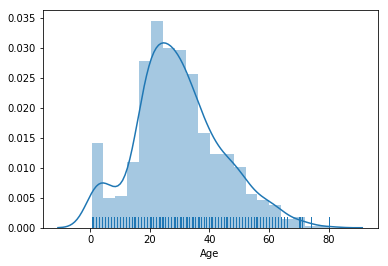

In [43]:
sns.distplot(trn_corpus_Age_dropna, rug=True, hist=True)

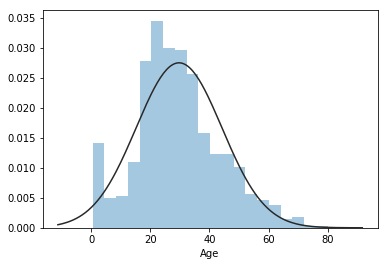

In [44]:
#Plot the distribution with a histogram and maximum likelihood gaussian distribution fit
from scipy.stats import norm
ax = sns.distplot(trn_corpus_Age_dropna, fit=norm, kde=False)

In [45]:
#ax = sns.distplot(trn_corpus_Age_dropna, vertical=True, color="y")

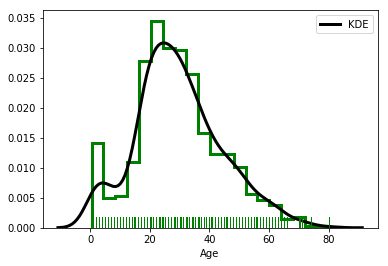

In [46]:
ax = sns.distplot(trn_corpus_Age_dropna, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                  "alpha": 1, "color": "g"})

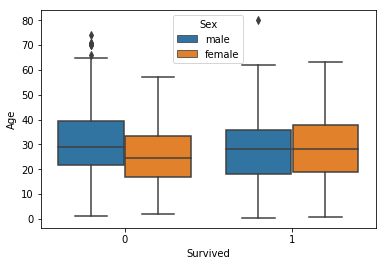

In [47]:
sns.boxplot(x="Survived", y="Age", hue="Sex", data=trn_corpus)

For boxplots, the assumption when using a hue variable is that it is nested within the x or y variable. This means that by default, the boxes for different levels of hue will be offset, as you can see above. If your hue variable is not nested, you can set the *dodge* parameter to disable offsetting:
Ref: http://seaborn.pydata.org/tutorial/categorical.html

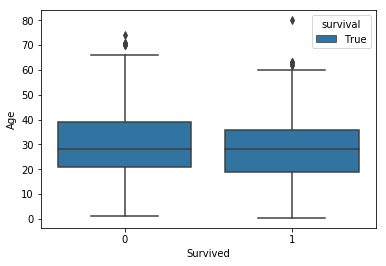

In [48]:
trn_corpus["survival"] = trn_corpus["Survived"].isin([0, 1])
sns.boxplot(x="Survived", y="Age", hue="survival", data=trn_corpus, dodge=False);

In [49]:
#sns.violinplot(x="Survived", y="Age", hue="Sex", data=trn_corpus)

In [50]:
#sns.violinplot(x="Survived", y="Age", hue="Sex", data=trn_corpus, split=True)

In [51]:
#sns.violinplot(x="Survived", y="Age", hue="Sex", data=trn_corpus, split=True, inner="stick", palette="Set3");

In [52]:
#sns.violinplot(x="Survived", y="Age", data=trn_corpus, inner=None)
#sns.swarmplot(x="Survived", y="Age", data=trn_corpus, color="w", alpha=.5);

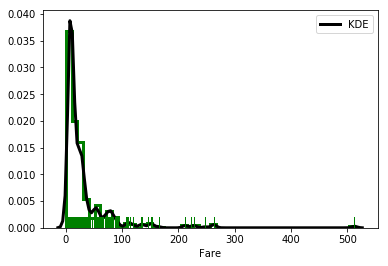

In [53]:
ax = sns.distplot(trn_corpus_Fare_dropna, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                  "alpha": 1, "color": "g"})

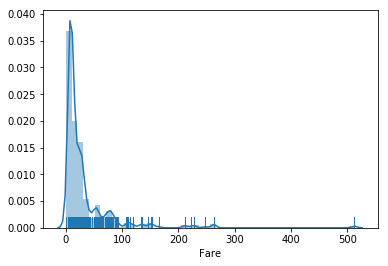

In [54]:
sns.distplot(trn_corpus_Fare_dropna, rug=True, hist=True)

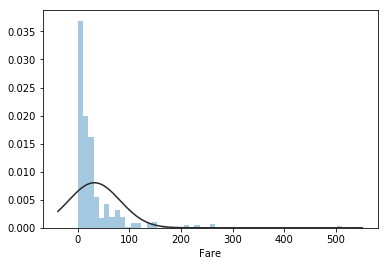

In [55]:
#Plot the distribution with a histogram and maximum likelihood gaussian distribution fit
from scipy.stats import norm
ax = sns.distplot(trn_corpus_Fare_dropna, fit=norm, kde=False)

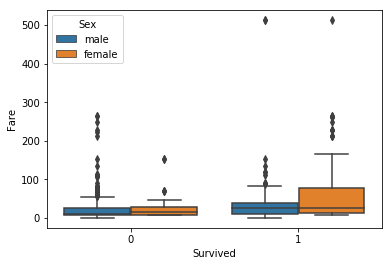

In [56]:
sns.boxplot(x="Survived", y="Fare", hue="Sex", data=trn_corpus)

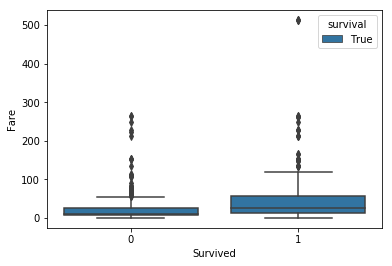

In [57]:
trn_corpus["survival"] = trn_corpus["Survived"].isin([0, 1])
sns.boxplot(x="Survived", y="Fare", hue="survival", data=trn_corpus, dodge=False);

**Categorial Variables**


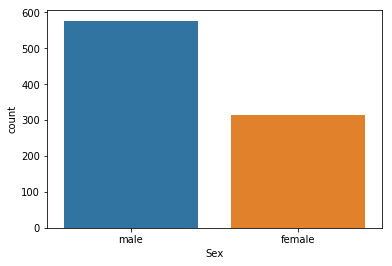

In [58]:
sns.countplot(x = "Sex", data = trn_corpus)

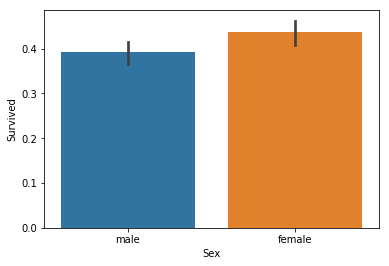

In [59]:
sns.barplot(x = "Sex", y = "Survived", data = trn_corpus, estimator=np.std)

### Step 3. Bi-variate Analysis 

**Continuous & Continuous**

**Categorial & Categorial**

**Categorial & Continuous**

### Step 4. Missing/Special Value Treatment

#### Missing Value Treatment

**Column "Age" - Missing Value**

Now let’s do a similar thing for age, replacing missing values with the overall mean. Later we’ll learn about more sophisticated techniques for replacing missing values and improve upon this.

In [60]:
# Duplicate one column Age in order to Fillna with meanAge of each Title (After having Title)
trn_corpus["AgeUsingMeanTitle"] = trn_corpus["Age"]

#meanAge=np.mean(trn_corpus["Age"])
#trn_corpus["Age"]=trn_corpus["Age"].fillna(meanAge)

In [61]:
trn_corpus.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survival,AgeUsingMeanTitle
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,35.0


**Column "Cabin" - Missing Value**

Now for the cabin, since the majority of values are missing, it might be best to treat that
as a piece of information itself, so we’ll set these to be ‘Unknown’.

In [62]:
#trn_corpus["Cabin"] = trn_corpus["Cabin"].fillna('Unknown') # because we will check Nan in the next step

**Column "Embarked" - Missing Value**

We set feature embarked having NaN to be the majority of column Embarked.

In [63]:
trn_corpus["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [64]:
trn_corpus["Embarked"].describe()["top"]

'S'

In [65]:
embarked_top = trn_corpus["Embarked"].describe()["top"]

trn_corpus["Embarked"] = trn_corpus["Embarked"].fillna(embarked_top)

trn_corpus.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survival,AgeUsingMeanTitle
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,35.0


In [66]:
trn_corpus["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

#### Special Value Treatment --> Ex: Fare = 0.0

In [67]:
classmeans_trn_corpus

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [68]:
classmeans_trn_corpus.xs(3)["Fare"]

13.675550101832997

In [69]:
#Ref: https://triangleinequality.wordpress.com/2013/05/19/machine-learning-with-python-first-steps-munging/

list_passenger_id_having_Fare_zero = list(trn_corpus[trn_corpus["Fare"] == 0.0]["PassengerId"])
list_passenger_id_having_Fare_zero

#so apply acts on dataframes, either row-wise or column-wise, axis=1 means rows
trn_corpus["Fare"] = trn_corpus[['Fare', 'Pclass']].apply(lambda x: classmeans_trn_corpus.xs(x['Pclass'])["Fare"]
                                                        if x['Fare']==0.0 else x['Fare'], axis=1 )

trn_corpus[trn_corpus["PassengerId"].apply(lambda x: x in list_passenger_id_having_Fare_zero)]

KeyError: 'PassengerId'

### Step 5. Outlier Detection and Treatment

## Feature Engineering

**Variable Transformation & Variable/Feature Creation**

### Step 1. Variable Transformation

### Step 2. Variable/Feature Creation

Ref: https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [ ]:
df = trn_corpus.copy()

### Titles

First up the Name column is currently not being used, but we can at least extract the title from the name. There are quite a few titles going around, but I want to reduce them all to Mrs, Miss, Mr and Master.  To do this we’ll need a function that searches for substrings. Thankfully the library ‘string’ has just what we need.

In [ ]:
def substrings_in_string(big_string, substrings):
    if big_string is np.nan:
        return np.nan
    #end if
    
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
        #end if
    #end for
    
    print(big_string)
    return np.nan
#end def
 
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if x['Sex'] == 'Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    #end if
#end def

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

df['Title'] = df['Name'].map(lambda x: substrings_in_string(x, title_list))
    
df['Title'] = df.apply(replace_titles, axis=1)

In [ ]:
df.head()

**Column "Age" - Missing Value - Using Mean for each Title**

Now let’s do a similar thing for age, replacing missing values with the overall mean. Later we’ll learn about more sophisticated techniques for replacing missing values and improve upon this.

In [ ]:
df[["Sex", "AgeUsingMeanTitle"]].groupby("Sex").mean()

In [ ]:
#Method 2 - Using pivot table
mean_title = df.pivot_table("AgeUsingMeanTitle", index = "Sex", aggfunc= "mean") #np.mean
mean_title

In [ ]:
mean_title.xs("male")["AgeUsingMeanTitle"]

In [ ]:
#list(df["AgeUsingMeanTitle"].unique())

In [ ]:
list_passenger_id_having_Age_nan = list(df[df["AgeUsingMeanTitle"].isnull()]["PassengerId"])

#list_passenger_id_having_Age_nan

In [ ]:
df["AgeUsingMeanTitle"].fillna(df.groupby("Sex")["AgeUsingMeanTitle"].transform("mean"), inplace=True)

df[df["PassengerId"].apply(lambda x: x in list_passenger_id_having_Age_nan)]

### Cabin

This is going be very similar, we have a ‘Cabin’ column not doing much, only 1st class passengers have cabins, the rest are ‘Unknown’. A cabin number looks like ‘C123’. The letter refers to the deck, and so we’re going to extract these just like the titles.

In [ ]:
#df["Cabin"].unique()

In [ ]:
df["Cabin"].nunique()

In [ ]:
#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'UNK']
df['Deck1']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

#df.head()

In [ ]:
#Task: How to get the Deck from Cabin
#Method 2
def get_deck_from_cabin(strCabin):
    if strCabin is np.nan:
        return np.nan
    #end if
    
    return strCabin[0]
#end def

df["Deck2"] = df["Cabin"].apply(get_deck_from_cabin)

#df.head()

### Question: Columns of Deck and Deck2 are the same?

In [ ]:
print(df["Deck1"].unique())
print(df["Deck1"].nunique())

In [ ]:
print(df["Deck2"].unique())
print(df["Deck2"].nunique())

In [ ]:
df[df["Deck1"].fillna("UNK") != df["Deck2"].fillna("UNK")]

**Comment:** We will use the values in column "Deck2".

### Family Size

One thing you can do to create new features is linear combinations of features. In a model like linear regression this should be unnecessary, but for a decision tree may find it hard to model such relationships. Reading on the forums at Kaggle, some people have considered the size of a person’s family, the sum of their ‘SibSp’ and ‘Parch’ attributes. Perhaps people traveling alone did better? Or on the other hand perhaps if you had a family, you might have risked your life looking for them, or even giving up a space up to them in a lifeboat. Let’s throw that into the mix.

In [ ]:
#Creating new family_size column
df['FamilySize']=df['SibSp']+df['Parch']

#df.head()

### AgeClass
This is an interaction term, since age and class are both numbers we can just multiply them.

In [ ]:
df['AgeClass']=df['AgeUsingMeanTitle']*df['Pclass']

#df.head()

### Adding Male column

This is the “sex” variable in the data set from kaggle. I’ve just changed male/female to 1/0.

In [ ]:
sex = {'male':1, 'female':0}
df["Male"] = df['Sex'].map(sex)

#df.head()

### SexClass
This is an interaction term, since age and class are both numbers we can just multiply them.

In [ ]:
df['SexClass']=df['Male']*df['Pclass']

#df.head()

### Fare per Person
Here we divide the fare by the number of family members traveling together, I’m not exactly sure what this represents, but it’s easy enough to add in.

In [ ]:
df['FarePerPerson']=df['Fare']/(df['FamilySize']+1)

#df.head()

### AgeSquared 
Here we use "combined_age" squared. 

"combined_age" – this is the age of the passenger, with missing values replaced by the median  age for each Title. So if the age was missing for Mr Smith, then I’ve used the median age for all passengers with Title “Mr”. 

In [ ]:
df["AgeSquared"]=df["AgeUsingMeanTitle"]**2

#df.head()

### AgeClassSquared 
Here we use "AgeClass" squared. 

In [ ]:
df["AgeClassSquared"]=df['AgeClass']**2

#df.head()

**Creating Dummy Variables**

In [ ]:
df.head()

### The predictor variables in the model are:

Ref: http://gertlowitz.blogspot.fr/2013/06/where-am-i-up-to-with-titanic-competion.html

In [ ]:
df.describe()

In [ ]:
df.info()

*   Male – this is the “sex” variable in the data set from kaggle. I’ve just changed male/female to 1/0.
*   Pclass -  no change from the pclass variable in the kaggle data set.
*   Fare – no change from the fare variable in the kaggle dataset
*   FarePerPerson – I have calculated the number of people travelling together (sibsp + parch + 1) and divided the fare variable by that number
*   Title – extracted the Title of each passenger from their name. I used Excel to do this and other data manipulation.
*   AgeUsingMeanTitle – this is the age of the passenger, with missing values replaced by the median  age for each Title. So if the age was missing for Mr Smith, then I’ve used the median age for all passengers with Title “Mr”.
*   AgeClass – multiplied “Combined Age” by pclass
*   SexClass – multiplied sex ( 1 or 2) by pclass.
*   FamilySize – sibsp + parch
*   AgeSquared – combined_age squared

*   AgeClassSquared – age_class squared

In [ ]:
df_train=df[["Male", "Pclass","Fare","FarePerPerson","Title",
            "AgeUsingMeanTitle","AgeClass","SexClass","FamilySize","AgeSquared","AgeClassSquared","Survived"]]

In [ ]:
df_train.describe()

In [ ]:
df_train.info()

In [ ]:
df_train.head()